<a href="https://colab.research.google.com/github/jere1882/DL_IADS22/blob/main/CNN_Covid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid diagnosis from images using convnets
In this notebook I will make use of a datasat with ~700 medical images, half of them corresponding to people that tested COVID positive:

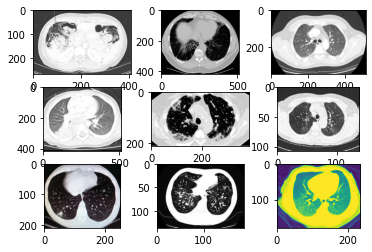

We'll try to learn to diagnose covid using convolutional neural networks. This notebook is organized as follows:

1. Download an preprocess data
2. Visualize data
3. Train a 3-layer CNN from scratch
4. Transfer learning

## Download and preprocess data

In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
^C


In [2]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

unzip:  cannot find or open /content/COVID-CT/Images-processed/CT_COVID.zip, /content/COVID-CT/Images-processed/CT_COVID.zip.zip or /content/COVID-CT/Images-processed/CT_COVID.zip.ZIP.
unzip:  cannot find or open /content/COVID-CT/Images-processed/CT_NonCOVID.zip, /content/COVID-CT/Images-processed/CT_NonCOVID.zip.zip or /content/COVID-CT/Images-processed/CT_NonCOVID.zip.ZIP.


In [3]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

FileNotFoundError: ignored

In [ ]:
# Let's split the data into train-validation-test

original_dataset_dir = '/content/'
base_dir = '/content/covid_images'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_positive_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_positive_dir)

train_negative_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_negative_dir)

validation_positive_dir = os.path.join(validation_dir, 'positive')
os.mkdir(validation_positive_dir)

validation_negative_dir = os.path.join(validation_dir, 'negative')
os.mkdir(validation_negative_dir)

test_positive_dir = os.path.join(test_dir, 'positive')
os.mkdir(test_positive_dir)

test_negative_dir = os.path.join(test_dir, 'negative')
os.mkdir(test_negative_dir)

In [ ]:
_, _, files = next(os.walk("/content/CT_COVID/"))
file_count = len(files)
positive_count = file_count

_, _, files = next(os.walk("/content/CT_NonCOVID/"))
file_count = len(files)
negative_count = file_count


In [ ]:
percentage_train = 0.85
percentage_valid = 0.15
percentage_test  = 0.0

from math import ceil

import shutil

from_range = 0
up_range = ceil(positive_count*0.7)
fnames = ['covid-{}.png'.format(i) for i in range(from_range,up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_COVID/", fname)
    dst = os.path.join(train_positive_dir, fname)
    shutil.copyfile(src, dst)

from_range = up_range + 1
up_range = ceil(from_range + positive_count*percentage_valid)
fnames = ['covid-{}.png'.format(i) for i in range(from_range, up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_COVID/", fname)
    dst = os.path.join(validation_positive_dir, fname)
    shutil.copyfile(src, dst)

from_range = up_range + 1
up_range = positive_count-1
fnames = ['covid-{}.png'.format(i) for i in range(from_range, up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_COVID/", fname)
    dst = os.path.join(test_positive_dir, fname)
    shutil.copyfile(src, dst)


from_range = 0
up_range = ceil(negative_count*0.7)
fnames = ['noncovid-{}.png'.format(i) for i in range(from_range,up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_NonCOVID/", fname)
    dst = os.path.join(train_negative_dir, fname)
    shutil.copyfile(src, dst)

from_range = up_range + 1
up_range = ceil(from_range + negative_count*percentage_valid)
fnames = ['noncovid-{}.png'.format(i) for i in range(from_range, up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_NonCOVID/", fname)
    dst = os.path.join(validation_negative_dir, fname)
    shutil.copyfile(src, dst)

from_range = up_range + 1
up_range = negative_count-1
fnames = ['noncovid-{}.png'.format(i) for i in range(from_range, up_range)]
for fname in fnames:
    src = os.path.join("/content/CT_NonCOVID/", fname)
    dst = os.path.join(test_negative_dir, fname)
    shutil.copyfile(src, dst)
    

# Visualize data
Let's have a look at a couple of pictures, so that we know what we are dealing with

Covid samples


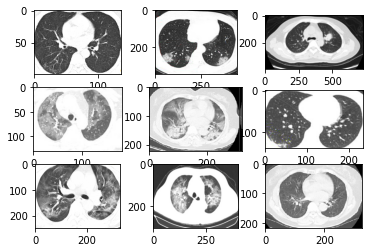

Non covid samples


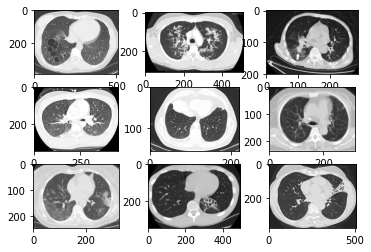

In [ ]:
# Plot a couple of samples
from matplotlib import pyplot
from matplotlib.image import imread

print("Covid samples")
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = '/content/CT_COVID/covid-' + str(i) + '.png'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

print("Non covid samples")
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = '/content/CT_NonCOVID/noncovid-' + str(i) + '.png'
	# load image pixels
	image = imread(filename,0)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# 3-layer convnet
Let's use 3 convolutional layers and two dense layers

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 523 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(128, (4, 4), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # convert to probabilities.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 35, 35, 64)        0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    verbose=0)

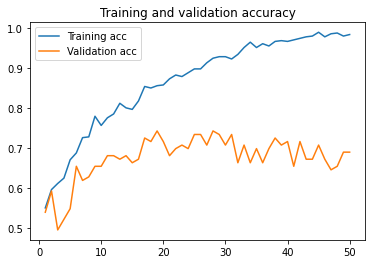

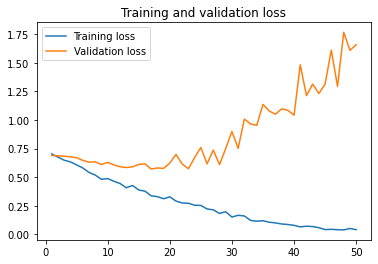

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

sns.lineplot(x=epochs, y=acc,  label='Training acc')
sns.lineplot(x=epochs, y=val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

sns.lineplot(x=epochs, y=loss,  label='Training loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

We can see that the model starts overfitting the data pretty early in training. This may be due to the fact that we have very few training samples.

# Try data augmentation
Let's see if we can augment the data by shifting, rotating, etc:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    verbose=1)

Found 523 images belonging to 2 classes.
Found 113 images belonging to 2 classes.
Epoch 1/50
27/27 [==============================] - 68s 2s/step - loss: 1.1659 - acc: 0.5774 - val_loss: 0.6048 - val_acc: 0.6460
Epoch 2/50
27/27 [==============================] - 67s 2s/step - loss: 0.7346 - acc: 0.5813 - val_loss: 0.6174 - val_acc: 0.6372
Epoch 3/50
27/27 [==============================] - 67s 2s/step - loss: 0.6876 - acc: 0.5870 - val_loss: 0.6531 - val_acc: 0.6283
Epoch 4/50
27/27 [==============================] - 67s 2s/step - loss: 0.6585 - acc: 0.6138 - val_loss: 0.6550 - val_acc: 0.5841
Epoch 5/50
27/27 [==============================] - 67s 2s/step - loss: 0.6580 - acc: 0.6138 - val_loss: 0.6758 - val_acc: 0.5487
Epoch 6/50
27/27 [==============================] - 67s 2s/step - loss: 0.6603 - acc: 0.6310 - val_loss: 0.6757 - val_acc: 0.5841
Epoch 7/50
27/27 [==============================] - 66s 2s/step - loss: 0.6424 - acc: 0.5985 - val_loss: 0.6700 - val_acc: 0.5841
Epoch 8/

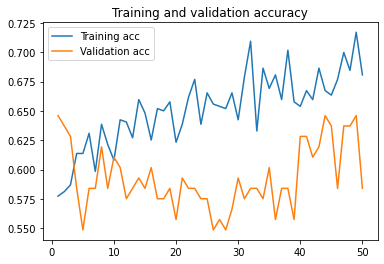

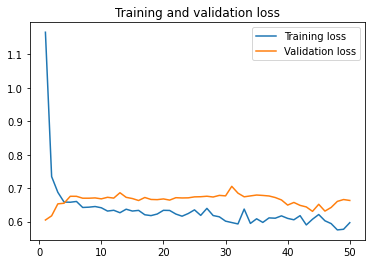

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

sns.lineplot(x=epochs, y=acc,  label='Training acc')
sns.lineplot(x=epochs, y=val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

sns.lineplot(x=epochs, y=loss,  label='Training loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


Using data augmentation does not seem to improve our model. The validation accuracy does not surpass that obtained without data augmentation.

# Transfer learning

The problem here may be that trainind data is scarce. I think this is a problem that would benefit from using transfer learning.

Jump to my follow-up notebook, where I will use pre-trained networks to boost the performance of covid classification on this dataset.

Spoiler: I go from 72% accuracy (this notebook) to 90% accuracy using a ResNet50 pre-trained on ImageNet.
